In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# url donde el .csv esta guardado
data_url = 'ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv'

# descargamos el dataset y lo colocamos en un DataFrame de pandas
data = pd.read_csv(data_url, skiprows=1)

# cambiamos los nombres para un facilitar el uso
old_column_names = data.columns
column_names = ['year', 'month', 'day', 'extent', 'missing', 'data product']

data = data.rename(columns={old_column_names[0]: column_names[0], 
                            old_column_names[1]: column_names[1],
                            old_column_names[2]: column_names[2],
                            old_column_names[3]: column_names[3], 
                            old_column_names[4]: column_names[4],
                            old_column_names[5]: column_names[5]})

In [2]:
data.head()

,year,month,day,extent,missing,data product
0,1978,10,26,10.231,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
1,1978,10,28,10.420,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
2,1978,10,30,10.557,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
3,1978,11,1,10.670,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
4,1978,11,3,10.777,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...


In [3]:
data.tail()

,year,month,day,extent,missing,data product
14127,2022,1,9,13.680,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2022.01.08/nt_202...
14128,2022,1,10,13.680,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2022.01.09/nt_202...
14129,2022,1,11,13.749,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2022.01.10/nt_202...
14130,2022,1,12,13.753,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2022.01.11/nt_202...
14131,2022,1,13,13.788,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2022.01.12/nt_202...


In [4]:
# create DateTime column
data['date'] = pd.to_datetime(data['year'].astype(str)+'/'+data['month'].astype(str)+'/'+data['day'].astype(str))

In [5]:
data['rolling_avg'] = data['extent'].rolling(window=21, center=True).mean()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14132 entries, 0 to 14131
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          14132 non-null  int64         
 1   month         14132 non-null  int64         
 2   day           14132 non-null  int64         
 3   extent        14132 non-null  float64       
 4   missing       14132 non-null  float64       
 5   data product  14132 non-null  object        
 6   date          14132 non-null  datetime64[ns]
 7   rolling_avg   14112 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 883.4+ KB


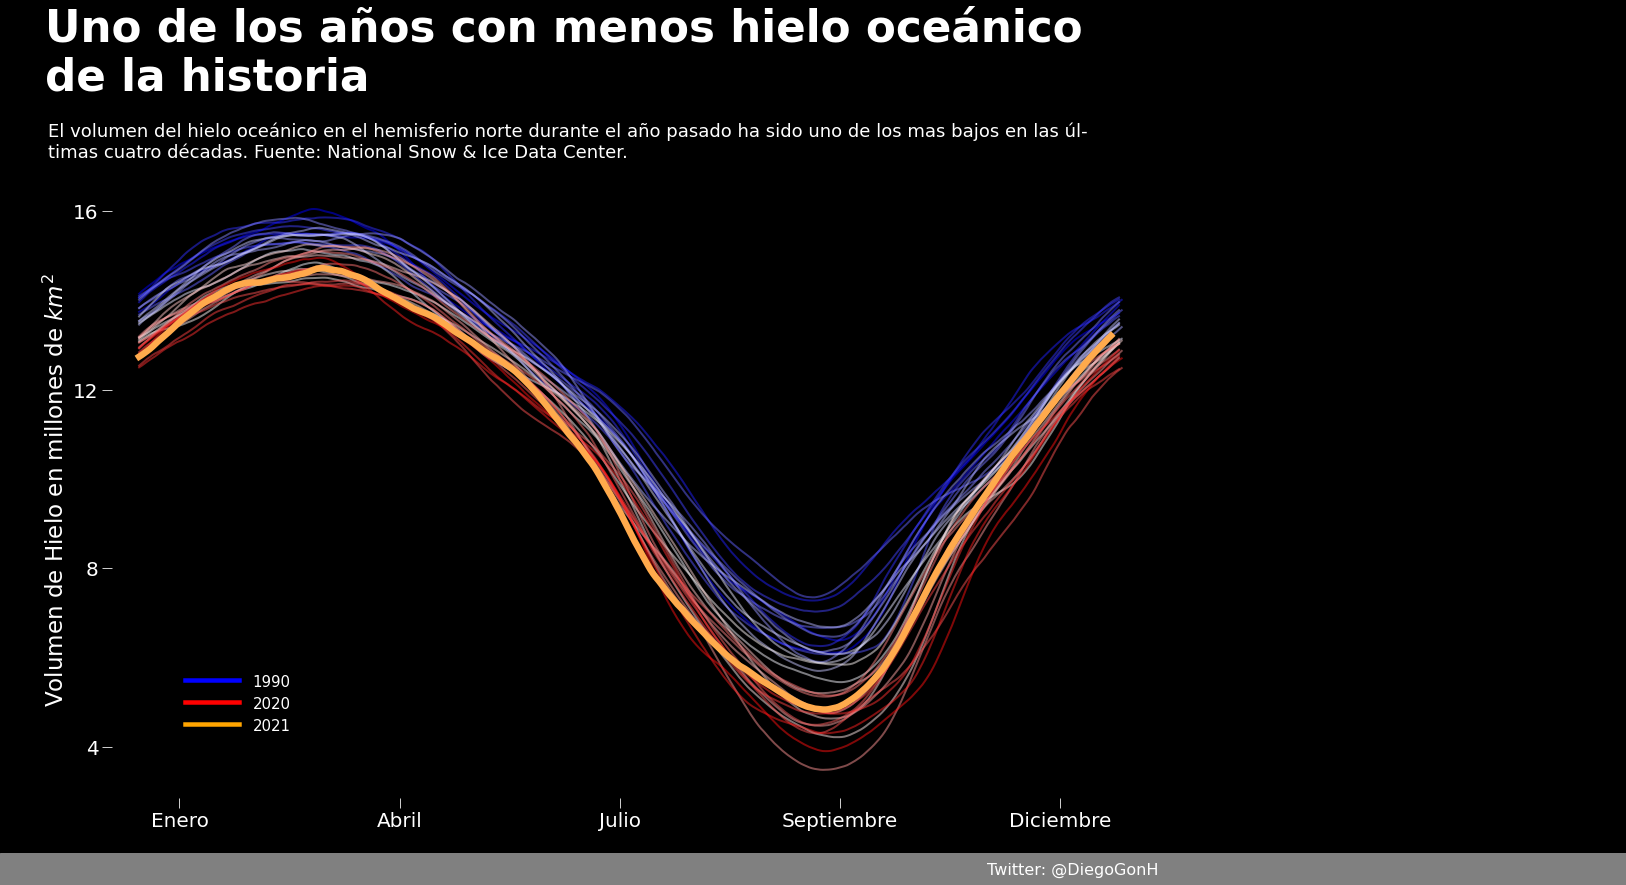

In [17]:
year_o = 1990
year_f = 2021

with plt.style.context('dark_background'):
    
    fig, ax = plt.subplots(1,1, figsize=(16,12.5)) 

    # don't show lines delimiting the graph
    for location in ['left', 'right', 'bottom', 'top']:
        ax.spines[location].set_visible(False)
    
    for year in np.arange(year_o,year_f):
        # get data
        mdf = data[data['year']==year]
        r = (year - year_o)/(year_f-year_o)
        # graficamos cada linea, y añadimos labels solo al primer y ultimo año
        if year == year_o:
            ax.plot(np.arange(mdf['date'].size), mdf['rolling_avg'], label=f'{year}', 
                     c=plt.cm.bwr(r), alpha=0.5, linewidth=2,zorder=-1)
        elif year == year_f-1:
            ax.plot(np.arange(mdf['date'].size), mdf['rolling_avg'], label=f'{year}', 
                     c=plt.cm.bwr(r), alpha=0.5, linewidth=2,zorder=-1)
        else:
            ax.plot(np.arange(mdf['date'].size), mdf['rolling_avg'], 
                     c=plt.cm.bwr(r), alpha=0.5, linewidth=2,zorder=-1)
            
    # plot last year
    mdf = data[data['year']==2021]
    ax.plot(np.arange(mdf['date'].size), mdf['rolling_avg'], label=f'{year}', 
                     c='#FFAA4C', alpha=1, linewidth=6.5)
    
#     ax.scatter(np.arange(mdf['date'].size)[-11], mdf['rolling_avg'].values[-11], 
#                      c='#FFAA4C', s=200, zorder=1)


    # change the color of the axes' tick labels
    ax.tick_params(axis='x', colors='white', size=10)
    ax.tick_params(axis='y', colors='white', size=10)

    # set the ticks and labels
    x_ticks_custom = np.linspace(15,350,5)
    x_ticks_custom2 = np.linspace(15,342,5)
    months_list = ['Enero', 'Febrero', 'Marzo', 
                   'Abril', 'Mayo', 'Junio', 
                   'Julio', 'Agosto', 'Septiembre', 
                   'Octubre', 'Noviembre', 'Diciembre']
    ax.set_xticks(x_ticks_custom2)
    m_list=[]
    for x in x_ticks_custom:
        m_list.append(months_list[int(x/30.)])
    ax.set_xticklabels(m_list, size=20)
    
    ax.set_yticks([4,8,12,16])
    ax.set_yticklabels([4,8,12,16], size=20)
    
    # Add title and subtitle
    ax.text(-35, 18.7, s='Uno de los años con menos hielo oceánico \nde la historia', size=43.7, weight='bold')
    ax.text(-33.7, 17.2, 
            s='El volumen del hielo oceánico en el hemisferio norte durante el año pasado ha sido uno de los mas bajos en las úl- \ntimas cuatro décadas. Fuente: National Snow & Ice Data Center.', 
            size=18)


    # add authorship
    ax.text(-49, 1.15, ' ' * 300,
                    color='white',
                    backgroundcolor='grey',
                    size=17)
    ax.text(315, 1.14,'Twitter: @DiegoGonH',
                    color='white',
                    size=16)
    
    ax.set_ylabel(r'Volumen de Hielo en millones de $km^2$', size=23)
    plt.xlim((-10,370))
    
    # adjust
    plt.subplots_adjust(right=0.97, left=0.082, bottom=0.0945, top=0.78)
    
    # add custom legend
    ax.plot([17, 37],[4.5, 4.5],color='orange', linewidth=4.5)
    ax.plot([17, 37],[5.0, 5.0],color='red', linewidth=4.5)
    ax.plot([17, 37],[5.5, 5.5],color='blue', linewidth=4.5)
    ax.text(42, 5.35, '1990', color='white', size=15)
    ax.text(42.445, 5.35-0.5, '2020', color='white', size=15)
    ax.text(42.4, 5.35-1, '2021', color='white', size=15)


    plt.savefig('hielo_oceanico_2021.jpg', dpi=128)

    plt.show()

In [8]:
data['year_and_month'] = data['date'].astype(str).apply(lambda x: x[:-3])

In [9]:
data.head(10)

,year,month,day,extent,missing,data product,date,rolling_avg,year_and_month
0,1978,10,26,10.231,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...,1978-10-26,NaN,1978-10
1,1978,10,28,10.420,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...,1978-10-28,NaN,1978-10
2,1978,10,30,10.557,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...,1978-10-30,NaN,1978-10
3,1978,11,1,10.670,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...,1978-11-01,NaN,1978-11
4,1978,11,3,10.777,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...,1978-11-03,NaN,1978-11
5,1978,11,5,10.968,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.05/nt_19...,1978-11-05,NaN,1978-11
6,1978,11,7,11.080,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.07/nt_19...,1978-11-07,NaN,1978-11
7,1978,11,9,11.189,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.09/nt_19...,1978-11-09,NaN,1978-11
8,1978,11,11,11.314,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.11/nt_19...,1978-11-11,NaN,1978-11
9,1978,11,13,11.460,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.13/nt_19...,1978-11-13,NaN,1978-11


In [10]:
month_averages = data[['year_and_month', 'month', 'extent']].groupby('year_and_month').mean()
month_averages

,month,extent
year_and_month,,
1978-10,10,10.402667
1978-11,11,11.645133
1978-12,12,13.667063
1979-01,1,15.414000
1979-02,2,16.175286
...,...,...
2021-09,9,4.915367
2021-10,10,6.770258
2021-11,11,9.808500


In [34]:
month_averages[month_averages['month'] == 7.0].sort_values('extent')

,month,extent
year_and_month,,
2020-07,7,7.293968
2019-07,7,7.589323
2012-07,7,7.671774
2021-07,7,7.688871
2011-07,7,7.724387
2016-07,7,7.937548
2017-07,7,7.939355
2007-07,7,7.942839
2010-07,7,8.074677


In [27]:
np.mean(data[(data['month'] == 7) & (data['year'] == 2021)]['extent'].values)

7.688870967741937

In [1]:
import numpy as np
import matplotlib.pyplot as plt

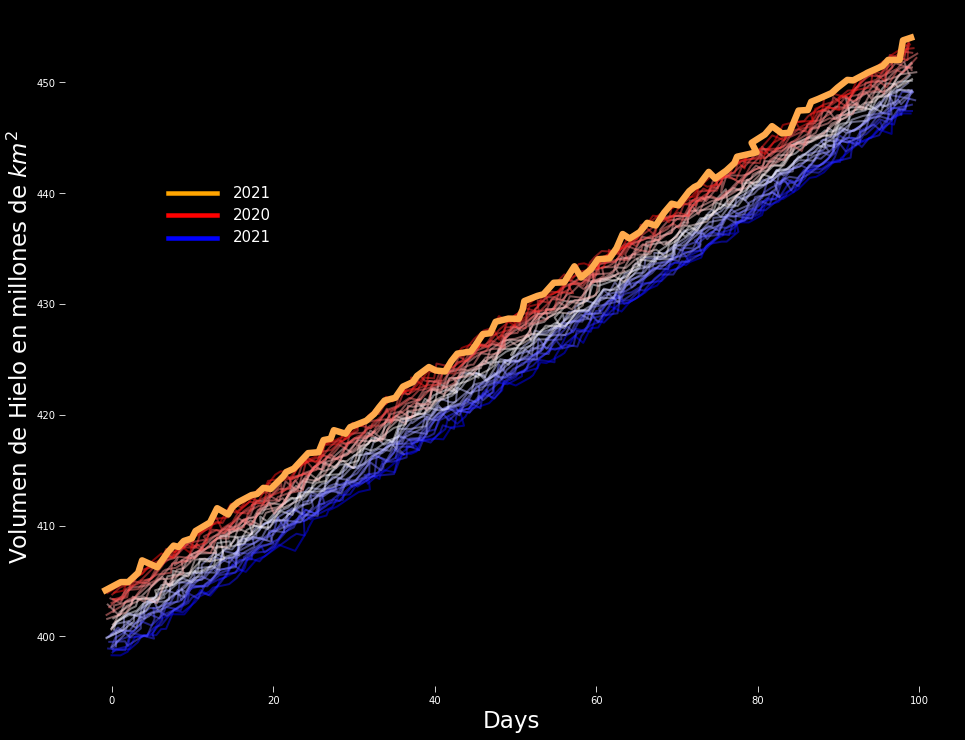

In [29]:
year_o = 1990
year_f = 2021
N=100

with plt.style.context('dark_background'):
    
    fig, ax = plt.subplots(1,1, figsize=(16,12.5)) 

    # don't show lines delimiting the graph
    for location in ['left', 'right', 'bottom', 'top']:
        ax.spines[location].set_visible(False)
    
    for year in np.arange(year_o,year_f):
        # get data
        # generate the set of z
        z = np.arange(N)#np.random.uniform(low=-1, high=1, size=N)

        # generate the fake data
        x = z + np.random.normal(loc=0.0, scale=.4, size=N)
        y = 0.5*z + np.random.normal(loc=0.0, scale=.4, size=N) + year/5
        r = (year - year_o)/(year_f-year_o)
        # graficamos cada linea, y añadimos labels solo al primer y ultimo año
        if year == year_o:
            ax.plot(x, y, label=f'{year}', 
                    c=plt.cm.bwr(r), alpha=0.5,
                    linewidth=2,zorder=-1)
        elif year == year_f-1:
            ax.plot(x, y, label=f'{year}', 
                    c=plt.cm.bwr(r), alpha=0.5,
                    linewidth=2,zorder=-1)
        else:
            ax.plot(x, y, 
                    c=plt.cm.bwr(r), alpha=0.5,
                    linewidth=2,zorder=-1)
            
    # plot last year
    x = z + np.random.normal(loc=0.0, scale=.4, size=N)
    y = 0.5*z + np.random.normal(loc=0.0, scale=.4, size=N) + 2021/5
    ax.plot(x, y, label=f'{year}', 
            c='#FFAA4C', alpha=1, linewidth=6.5)


    # change the color of the axes' tick labels
    ax.tick_params(axis='x', colors='white', size=6)
    ax.tick_params(axis='y', colors='white', size=6)
    
    ax.set_ylabel(r'Volumen de Hielo en millones de $km^2$', size=23)
    ax.set_xlabel(r'Days', size=23)
    
    # add custom legend
    ax.plot([7, 13],[440, 440],color='orange', linewidth=4.5)
    ax.plot([7, 13],[438, 438],color='red', linewidth=4.5)
    ax.plot([7, 13],[436, 436],color='blue', linewidth=4.5)
    ax.text(15, 440, '2021', color='white', size=15, va='center')
    ax.text(15, 438, '2020', color='white', size=15, va='center')
    ax.text(15, 436, '2021', color='white', size=15, va='center')


    plt.savefig('ejemplo_hielo_oceanico.jpg', dpi=128)

    plt.show()